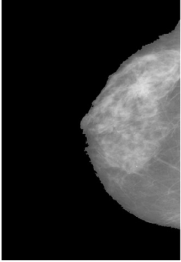

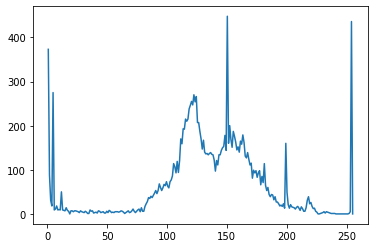

FINAL:
[255.0, 255.0, 104.07292239326736, 36.370468958151214, 145.09943373251423]
-6133396.661444262
FINAL:
[164.9363290677992, 36.52829641756714, 255.0, 134.69173617870752, 100.59029641352296]
-6137146.597041044
FINAL:
[68.73216766208483, 146.32311218342934, 110.58206024289834, 13.584805817924856, 255.0]
-6137279.913308214
FINAL:
[255.0, 20.49309716831305, 130.74943741473365, 162.71188496493693, 82.9088273483836]
-6137310.894694649
FINAL:
[255.0, 17.92208907768601, 70.55587997684788, 148.86168650823518, 114.5515395723673]
-6137333.8737859875
FINAL:
[146.11002167658054, 114.45124362196735, 20.808569542129536, 76.90000164526697, 255.0]
-6137348.930570208
FINAL:
[147.35615287584326, 113.09263800917769, 255, 16.079187596435265, 71.5054389996684]
-6137394.759526106
FINAL:
[255, 36.04188050178114, 135.6152846558438, 102.2498987705141, 164.89350975127712]
-6137143.742916906
FINAL:
[144.27687858987483, 255.0, 104.8758042961621, 255.0, 36.79249733574297]
-6133396.616875965
FINAL:
[20.486698528

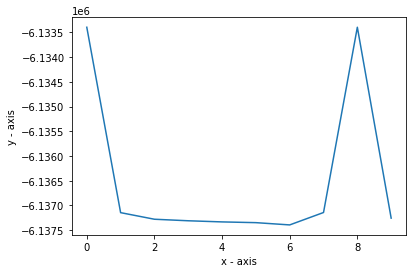

[255.0, 159.79155487203207, 126.43352435448067, 77.41810685547671, 20.48669852899134]


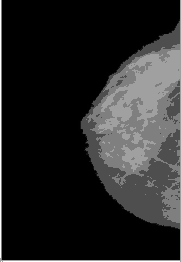

PSNR value for this image is 33.178537756989506
SSIM: 0.8888973164526278


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:207: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


In [ ]:
%matplotlib inline
import cv2 
import math
import random
import numpy
import time
import matplotlib.pyplot as plt 
from math import log10, sqrt 
from skimage.measure import compare_ssim
from google.colab.patches import cv2_imshow

image='1.png'
img = cv2.imread(image,0)
h, bin_edges = numpy.histogram(img, bins=256, range=(1, 256))
L=256
rr = []
y = []
imgplot = cv2_imshow(img)
plt.show()
plt.plot( bin_edges[:-1],h) 
plt.show()
nt=5

# print(h)

def PSNR(original, compressed): 
    mse = numpy.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal .  
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 


def u(a,b):
    t1 = 0
    t2 = 0
    for i in range(a,b):
        t1 = t1 + (i*(h[i-1]+1))
    for i in range(a,b):
        t2 = t2 + h[i-1]+1
#     print(t2)
    return t1/t2

def hh(a,th):
    if a==1 :
        t=0
        for i in range(a,th[0]):
            t=t+(i*h[i-1]*math.log(u(1,th[0])))
        return t
    if a<=nt :
        t=0
        for i in range(th[a-2],th[a-1]):
            t=t+(i*h[i-1]*math.log(u(th[a-2],th[a-1])))
        return t
    if a==nt+1 :
        t=0
        for i in range(th[a-2],L+1):
            t=t+(i*h[i-1]*math.log(u(th[a-2],L+1)))
        return t

def objf(tt):
    t1=0
    t2=0
    tt=numpy.sort(tt)
    th=[0,0,0,0,0,0,0,0,0,0]
    for i in range(0,nt):
        th[i]=int(tt[i])
    for i in range(1,L+1):
        t1=t1+(i*h[i-1]*math.log10(i))
    for i in range(1,nt+2):
        t2=t2+hh(i,th)
    return t1-t2
    
def func1(x):
    total=0
    for i in range(len(x)):
        total+=x[i]**2
    return total

class Particle:
    def __init__(self,x0):
        self.position_i=[]
        self.velocity_i=[]
        self.pos_best_i=[]
        self.err_best_i=-1
        self.err_i=-1

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)
#         print(self.position_i)
#         print(self.err_i)
#         print(self.err_best_i)
#         print("")
        if self.err_i < self.err_best_i or self.err_best_i==-1:
#             print("updated")
#             print(self.err_best_i)
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    def update_velocity(self,pos_best_g):
        w=0.5
        c1=4
        c2=4

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]
            
            if self.position_i[i]>bounds[1][i]:
                self.position_i[i]=bounds[1][i]
            if self.position_i[i] < bounds[0][i]:
                self.position_i[i]=bounds[0][i]

class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions
        global err_best_g

        num_dimensions=len(x0)
        err_best_g=-1
        pos_best_g=[]

        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0))

        i=0
        while i < maxiter:
            for j in range(0,num_particles):
                swarm[j].evaluate(objf)

                if swarm[j].err_i < err_best_g or err_best_g == -1:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)
            #print i
            for j in range(0,num_particles):
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
                #print j,swarm[j].position_i,swarm[j].velocity_i,swarm[j].err_i
            i+=1

        print('FINAL:')
        print(pos_best_g)
        print(err_best_g)
        rr.append(pos_best_g)
        y.append(err_best_g)
        

x = []
for i in range(0,10):
    initial=numpy.random.randint(1,255,nt) 
    bounds=[(1,1,1,1,1,1,1,1,1,1),(255,255,255,255,255,255,255,255,255,255)]
    t=PSO(func1,initial,bounds,num_particles=10,maxiter=100)
    x.append(i)
plt.plot(x, y) 
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.show()

t=y[0]
result=rr[0]
for r in range(1,len(y)):
    if y[i]<t:
        t=y[i]
        result=rr[i]
result.sort()
result=result[::-1]
print(result)
h,w = img.shape
#print(img)
for i in range(0,h):
    for j in range(0,w):
        t = 255/nt
        p = 255
        for k in range(0,nt+1):
            if k==0:
                if img[i][j]>result[k] and img[i][j]<=256:
                    img[i][j]=int(result[k]+1)
            elif k<nt:
                if img[i][j]>result[k] and img[i][j]<result[k-1]:
                    img[i][j]=int(result[k]+1)
            else:
                if img[i][j]>0 and img[i][j]<result[k-1]:
                    img[i][j]=1
            p-=t

imgplot = cv2_imshow(img)
plt.show()
oimg = cv2.imread(image,0)
#print(img)
#print(oimg)
value=PSNR(img,oimg)
print('PSNR value for this image is '+str(value))
(score, diff) = compare_ssim(img, oimg, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))


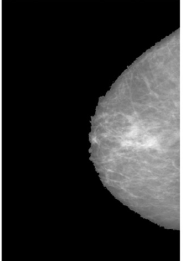

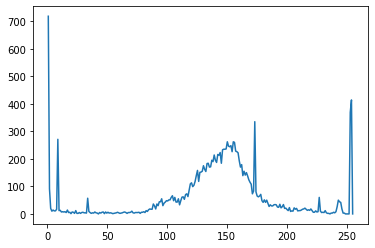

FINAL:
[63.63110939516182, 213.44803563508367, 148.97127896516415, 17.455372643083535, 117.79140905649241]
-6288167.32506961
FINAL:
[79.6962681292604, 154.8466952423194, 214.64214035648874, 122.3645302503122, 17.102290761637782]
-6288439.392167212
FINAL:
[125.96303512130574, 16.191320674058936, 77.16405227595264, 154.55686928011457, 215.93162163642413]
-6288353.431975795
FINAL:
[15.897874349655819, 117.35490067356625, 149.18919712399986, 70.14002834538502, 212.0907077658793]
-6288358.189975437
FINAL:
[17.659897004165934, 215.2056851611329, 122.90724734092394, 77.0597433557124, 152.17595092405185]
-6288414.81964411
FINAL:
[119.2134114458754, 17.585106000180566, 211.54162692006457, 71.6915107266877, 152.55269212713017]
-6288372.774547225
FINAL:
[121.96720648891198, 80.9564755403789, 217.9677147635934, 18.445496117201547, 155.54674241390495]
-6288277.902879411
FINAL:
[216.32088903049848, 156.9134325470999, 17.31870243546302, 124.21052424838518, 81.37144841339425]
-6288341.675769869
FINAL:

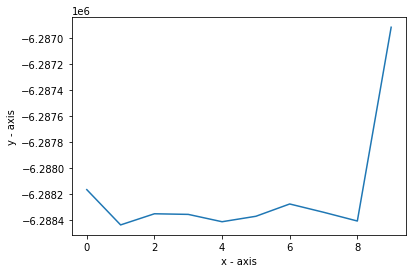

[213.44803563508367, 148.97127896516415, 117.79140905649241, 63.63110939516182, 17.455372643083535]


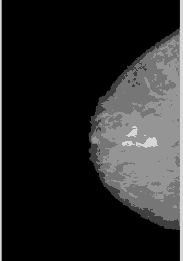

PSNR value for this image is 33.45992740567591
SSIM: 0.8968567320151326


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:207: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


In [ ]:
%matplotlib inline
import cv2 
import math
import random
import numpy
import time
import matplotlib.pyplot as plt 
from math import log10, sqrt 
from skimage.measure import compare_ssim
from google.colab.patches import cv2_imshow

image='2.png'
img = cv2.imread(image,0)
h, bin_edges = numpy.histogram(img, bins=256, range=(1, 256))
L=256
rr = []
y = []
imgplot = cv2_imshow(img)
plt.show()
plt.plot( bin_edges[:-1],h) 
plt.show()
nt=5

# print(h)

def PSNR(original, compressed): 
    mse = numpy.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal .  
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 


def u(a,b):
    t1 = 0
    t2 = 0
    for i in range(a,b):
        t1 = t1 + (i*(h[i-1]+1))
    for i in range(a,b):
        t2 = t2 + h[i-1]+1
#     print(t2)
    return t1/t2

def hh(a,th):
    if a==1 :
        t=0
        for i in range(a,th[0]):
            t=t+(i*h[i-1]*math.log(u(1,th[0])))
        return t
    if a<=nt :
        t=0
        for i in range(th[a-2],th[a-1]):
            t=t+(i*h[i-1]*math.log(u(th[a-2],th[a-1])))
        return t
    if a==nt+1 :
        t=0
        for i in range(th[a-2],L+1):
            t=t+(i*h[i-1]*math.log(u(th[a-2],L+1)))
        return t

def objf(tt):
    t1=0
    t2=0
    tt=numpy.sort(tt)
    th=[0,0,0,0,0,0,0,0,0,0]
    for i in range(0,nt):
        th[i]=int(tt[i])
    for i in range(1,L+1):
        t1=t1+(i*h[i-1]*math.log10(i))
    for i in range(1,nt+2):
        t2=t2+hh(i,th)
    return t1-t2
    
def func1(x):
    total=0
    for i in range(len(x)):
        total+=x[i]**2
    return total

class Particle:
    def __init__(self,x0):
        self.position_i=[]
        self.velocity_i=[]
        self.pos_best_i=[]
        self.err_best_i=-1
        self.err_i=-1

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)
#         print(self.position_i)
#         print(self.err_i)
#         print(self.err_best_i)
#         print("")
        if self.err_i < self.err_best_i or self.err_best_i==-1:
#             print("updated")
#             print(self.err_best_i)
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    def update_velocity(self,pos_best_g):
        w=0.5
        c1=4
        c2=4

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]
            
            if self.position_i[i]>bounds[1][i]:
                self.position_i[i]=bounds[1][i]
            if self.position_i[i] < bounds[0][i]:
                self.position_i[i]=bounds[0][i]

class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions
        global err_best_g

        num_dimensions=len(x0)
        err_best_g=-1
        pos_best_g=[]

        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0))

        i=0
        while i < maxiter:
            for j in range(0,num_particles):
                swarm[j].evaluate(objf)

                if swarm[j].err_i < err_best_g or err_best_g == -1:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)
            #print i
            for j in range(0,num_particles):
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
                #print j,swarm[j].position_i,swarm[j].velocity_i,swarm[j].err_i
            i+=1

        print('FINAL:')
        print(pos_best_g)
        print(err_best_g)
        rr.append(pos_best_g)
        y.append(err_best_g)
        

x = []
for i in range(0,10):
    initial=numpy.random.randint(1,255,nt) 
    bounds=[(1,1,1,1,1,1,1,1,1,1),(255,255,255,255,255,255,255,255,255,255)]
    t=PSO(func1,initial,bounds,num_particles=10,maxiter=100)
    x.append(i)
plt.plot(x, y) 
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.show()

t=y[0]
result=rr[0]
for r in range(1,len(y)):
    if y[i]<t:
        t=y[i]
        result=rr[i]
result.sort()
result=result[::-1]
print(result)
h,w = img.shape
#print(img)
for i in range(0,h):
    for j in range(0,w):
        t = 255/nt
        p = 255
        for k in range(0,nt+1):
            if k==0:
                if img[i][j]>result[k] and img[i][j]<=256:
                    img[i][j]=int(result[k]+1)
            elif k<nt:
                if img[i][j]>result[k] and img[i][j]<result[k-1]:
                    img[i][j]=int(result[k]+1)
            else:
                if img[i][j]>0 and img[i][j]<result[k-1]:
                    img[i][j]=1
            p-=t

imgplot = cv2_imshow(img)
plt.show()
oimg = cv2.imread(image,0)
#print(img)
#print(oimg)
value=PSNR(img,oimg)
print('PSNR value for this image is '+str(value))
(score, diff) = compare_ssim(img, oimg, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))


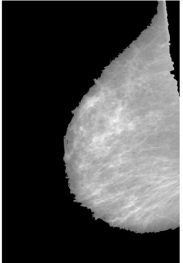

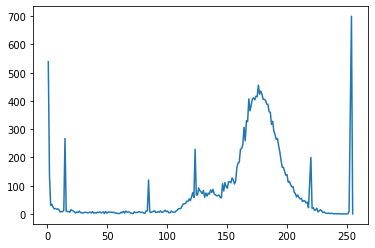

FINAL:
[177.3991623880784, 10.636190958874684, 141.76455431433635, 75.8056060815001, 252.10861068865356]
-10428024.892741252
FINAL:
[108.6113144358374, 183.45908460555748, 153.9416850572799, 32.58583544875019, 253.65113437825966]
-10427931.957667027
FINAL:
[184.76168906896268, 149.80657380500105, 255, 76.15095955520368, 11.176825509298073]
-10425313.056898512
FINAL:
[9.153199670016383, 110.92197176902272, 49.67069221912903, 161.6360003268747, 254.76239468318983]
-10427183.69288661
FINAL:
[77.13524241775298, 244.21857854691973, 143.4999947923961, 8.048052171048525, 180.17174060237264]
-10427462.22363935
FINAL:
[180.29989689249123, 253.6421424930243, 32.519605354941646, 107.71931611588394, 149.5423341734511]
-10427946.146759193
FINAL:
[249.22888740668387, 112.1780468670341, 49.98528014655513, 6.987729189905679, 161.16582225911546]
-10426870.666315973
FINAL:
[108.49404329891993, 182.574486942619, 254.99780855949655, 151.15909957159698, 32.662448410165545]
-10427954.169206284
FINAL:
[9.564

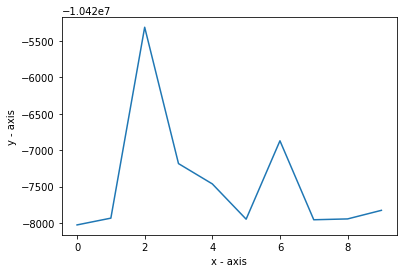

[252.10861068865356, 177.3991623880784, 141.76455431433635, 75.8056060815001, 10.636190958874684]


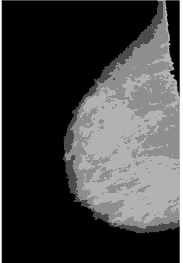

PSNR value for this image is 32.291348295281836
SSIM: 0.8403048465793074


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:207: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


In [ ]:
%matplotlib inline
import cv2 
import math
import random
import numpy
import time
import matplotlib.pyplot as plt 
from math import log10, sqrt 
from skimage.measure import compare_ssim
from google.colab.patches import cv2_imshow

image='3.png'
img = cv2.imread(image,0)
h, bin_edges = numpy.histogram(img, bins=256, range=(1, 256))
L=256
rr = []
y = []
imgplot = cv2_imshow(img)
plt.show()
plt.plot( bin_edges[:-1],h) 
plt.show()
nt=5

# print(h)

def PSNR(original, compressed): 
    mse = numpy.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal .  
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 


def u(a,b):
    t1 = 0
    t2 = 0
    for i in range(a,b):
        t1 = t1 + (i*(h[i-1]+1))
    for i in range(a,b):
        t2 = t2 + h[i-1]+1
#     print(t2)
    return t1/t2

def hh(a,th):
    if a==1 :
        t=0
        for i in range(a,th[0]):
            t=t+(i*h[i-1]*math.log(u(1,th[0])))
        return t
    if a<=nt :
        t=0
        for i in range(th[a-2],th[a-1]):
            t=t+(i*h[i-1]*math.log(u(th[a-2],th[a-1])))
        return t
    if a==nt+1 :
        t=0
        for i in range(th[a-2],L+1):
            t=t+(i*h[i-1]*math.log(u(th[a-2],L+1)))
        return t

def objf(tt):
    t1=0
    t2=0
    tt=numpy.sort(tt)
    th=[0,0,0,0,0,0,0,0,0,0]
    for i in range(0,nt):
        th[i]=int(tt[i])
    for i in range(1,L+1):
        t1=t1+(i*h[i-1]*math.log10(i))
    for i in range(1,nt+2):
        t2=t2+hh(i,th)
    return t1-t2
    
def func1(x):
    total=0
    for i in range(len(x)):
        total+=x[i]**2
    return total

class Particle:
    def __init__(self,x0):
        self.position_i=[]
        self.velocity_i=[]
        self.pos_best_i=[]
        self.err_best_i=-1
        self.err_i=-1

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)
#         print(self.position_i)
#         print(self.err_i)
#         print(self.err_best_i)
#         print("")
        if self.err_i < self.err_best_i or self.err_best_i==-1:
#             print("updated")
#             print(self.err_best_i)
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    def update_velocity(self,pos_best_g):
        w=0.5
        c1=4
        c2=4

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]
            
            if self.position_i[i]>bounds[1][i]:
                self.position_i[i]=bounds[1][i]
            if self.position_i[i] < bounds[0][i]:
                self.position_i[i]=bounds[0][i]

class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions
        global err_best_g

        num_dimensions=len(x0)
        err_best_g=-1
        pos_best_g=[]

        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0))

        i=0
        while i < maxiter:
            for j in range(0,num_particles):
                swarm[j].evaluate(objf)

                if swarm[j].err_i < err_best_g or err_best_g == -1:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)
            #print i
            for j in range(0,num_particles):
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
                #print j,swarm[j].position_i,swarm[j].velocity_i,swarm[j].err_i
            i+=1

        print('FINAL:')
        print(pos_best_g)
        print(err_best_g)
        rr.append(pos_best_g)
        y.append(err_best_g)
        

x = []
for i in range(0,10):
    initial=numpy.random.randint(1,255,nt) 
    bounds=[(1,1,1,1,1,1,1,1,1,1),(255,255,255,255,255,255,255,255,255,255)]
    t=PSO(func1,initial,bounds,num_particles=10,maxiter=100)
    x.append(i)
plt.plot(x, y) 
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.show()

t=y[0]
result=rr[0]
for r in range(1,len(y)):
    if y[i]<t:
        t=y[i]
        result=rr[i]
result.sort()
result=result[::-1]
print(result)
h,w = img.shape
#print(img)
for i in range(0,h):
    for j in range(0,w):
        t = 255/nt
        p = 255
        for k in range(0,nt+1):
            if k==0:
                if img[i][j]>result[k] and img[i][j]<=256:
                    img[i][j]=int(result[k]+1)
            elif k<nt:
                if img[i][j]>result[k] and img[i][j]<result[k-1]:
                    img[i][j]=int(result[k]+1)
            else:
                if img[i][j]>0 and img[i][j]<result[k-1]:
                    img[i][j]=1
            p-=t

imgplot = cv2_imshow(img)
plt.show()
oimg = cv2.imread(image,0)
#print(img)
#print(oimg)
value=PSNR(img,oimg)
print('PSNR value for this image is '+str(value))
(score, diff) = compare_ssim(img, oimg, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))


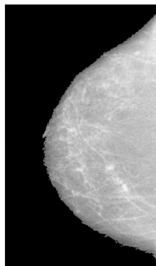

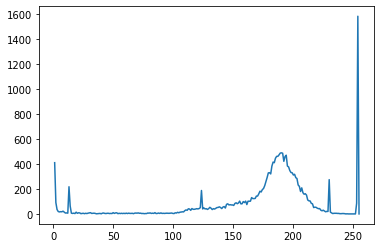

FINAL:
[30.13225623229974, 94.76290230633506, 251.06242584731874, 185.81466200403963, 153.79203099487933]
-11451996.091360873
FINAL:
[183.72907722933576, 68.17267405923799, 7.541725182538223, 144.79140697537392, 255.0]
-11450847.118818069
FINAL:
[152.26962240781467, 254.87625206042796, 186.40260301819967, 96.51888908146492, 29.449631688612683]
-11452287.9648788
FINAL:
[188.78287620671, 29.15426099308299, 102.10612129174214, 154.30796899989446, 255]
-11451820.843252635
FINAL:
[189.55946363403146, 29.97456347627417, 156.93089307659267, 103.83687891586003, 255.0]
-11451772.258540655
FINAL:
[91.48357465505866, 177.7135287604613, 254.59030034992855, 25.53850360803915, 141.38689599546274]
-11451811.178555371
FINAL:
[255.0, 155.2122205314589, 27.17174667278595, 102.50304912204375, 189.8313609086471]
-11451805.794229763
FINAL:
[7.877439764196388, 166.7719820106361, 229.73904823893284, 104.78841311239535, 41.05060131320003]
-11450248.54070429
FINAL:
[41.991661730150014, 255.0, 166.5145064996607

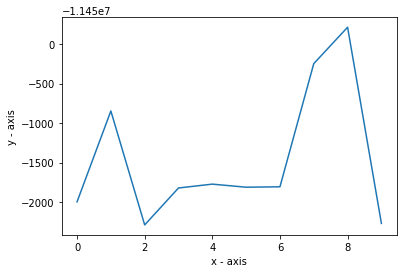

[254.1162788609096, 187.1191633785814, 155.57203546600542, 100.46287383064684, 27.67936694383136]


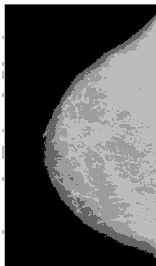

PSNR value for this image is 31.711729665469015
SSIM: 0.8343352665120833


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:207: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


In [ ]:
%matplotlib inline
import cv2 
import math
import random
import numpy
import time
import matplotlib.pyplot as plt 
from math import log10, sqrt 
from skimage.measure import compare_ssim
from google.colab.patches import cv2_imshow

image='4.png'
img = cv2.imread(image,0)
h, bin_edges = numpy.histogram(img, bins=256, range=(1, 256))
L=256
rr = []
y = []
imgplot = cv2_imshow(img)
plt.show()
plt.plot( bin_edges[:-1],h) 
plt.show()
nt=5

# print(h)

def PSNR(original, compressed): 
    mse = numpy.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal .  
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 


def u(a,b):
    t1 = 0
    t2 = 0
    for i in range(a,b):
        t1 = t1 + (i*(h[i-1]+1))
    for i in range(a,b):
        t2 = t2 + h[i-1]+1
#     print(t2)
    return t1/t2

def hh(a,th):
    if a==1 :
        t=0
        for i in range(a,th[0]):
            t=t+(i*h[i-1]*math.log(u(1,th[0])))
        return t
    if a<=nt :
        t=0
        for i in range(th[a-2],th[a-1]):
            t=t+(i*h[i-1]*math.log(u(th[a-2],th[a-1])))
        return t
    if a==nt+1 :
        t=0
        for i in range(th[a-2],L+1):
            t=t+(i*h[i-1]*math.log(u(th[a-2],L+1)))
        return t

def objf(tt):
    t1=0
    t2=0
    tt=numpy.sort(tt)
    th=[0,0,0,0,0,0,0,0,0,0]
    for i in range(0,nt):
        th[i]=int(tt[i])
    for i in range(1,L+1):
        t1=t1+(i*h[i-1]*math.log10(i))
    for i in range(1,nt+2):
        t2=t2+hh(i,th)
    return t1-t2
    
def func1(x):
    total=0
    for i in range(len(x)):
        total+=x[i]**2
    return total

class Particle:
    def __init__(self,x0):
        self.position_i=[]
        self.velocity_i=[]
        self.pos_best_i=[]
        self.err_best_i=-1
        self.err_i=-1

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)
#         print(self.position_i)
#         print(self.err_i)
#         print(self.err_best_i)
#         print("")
        if self.err_i < self.err_best_i or self.err_best_i==-1:
#             print("updated")
#             print(self.err_best_i)
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    def update_velocity(self,pos_best_g):
        w=0.5
        c1=4
        c2=4

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]
            
            if self.position_i[i]>bounds[1][i]:
                self.position_i[i]=bounds[1][i]
            if self.position_i[i] < bounds[0][i]:
                self.position_i[i]=bounds[0][i]

class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions
        global err_best_g

        num_dimensions=len(x0)
        err_best_g=-1
        pos_best_g=[]

        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0))

        i=0
        while i < maxiter:
            for j in range(0,num_particles):
                swarm[j].evaluate(objf)

                if swarm[j].err_i < err_best_g or err_best_g == -1:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)
            #print i
            for j in range(0,num_particles):
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
                #print j,swarm[j].position_i,swarm[j].velocity_i,swarm[j].err_i
            i+=1

        print('FINAL:')
        print(pos_best_g)
        print(err_best_g)
        rr.append(pos_best_g)
        y.append(err_best_g)
        

x = []
for i in range(0,10):
    initial=numpy.random.randint(1,255,nt) 
    bounds=[(1,1,1,1,1,1,1,1,1,1),(255,255,255,255,255,255,255,255,255,255)]
    t=PSO(func1,initial,bounds,num_particles=10,maxiter=100)
    x.append(i)
plt.plot(x, y) 
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.show()

t=y[0]
result=rr[0]
for r in range(1,len(y)):
    if y[i]<t:
        t=y[i]
        result=rr[i]
result.sort()
result=result[::-1]
print(result)
h,w = img.shape
#print(img)
for i in range(0,h):
    for j in range(0,w):
        t = 255/nt
        p = 255
        for k in range(0,nt+1):
            if k==0:
                if img[i][j]>result[k] and img[i][j]<=256:
                    img[i][j]=int(result[k]+1)
            elif k<nt:
                if img[i][j]>result[k] and img[i][j]<result[k-1]:
                    img[i][j]=int(result[k]+1)
            else:
                if img[i][j]>0 and img[i][j]<result[k-1]:
                    img[i][j]=1
            p-=t

imgplot = cv2_imshow(img)
plt.show()
oimg = cv2.imread(image,0)
#print(img)
#print(oimg)
value=PSNR(img,oimg)
print('PSNR value for this image is '+str(value))
(score, diff) = compare_ssim(img, oimg, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))


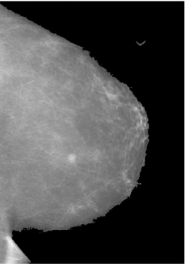

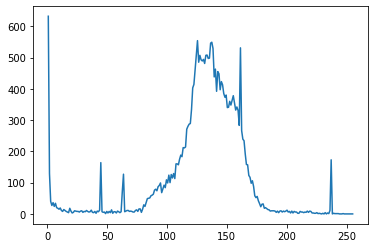

FINAL:
[77.89824283355672, 19.301460996564373, 116.94937900796248, 143.97612335756693, 237.53166120226376]
-9991779.352895122
FINAL:
[144.65771707405136, 19.94877378097308, 231.32412579563754, 77.94044656987435, 116.78150137065069]
-9991476.161804188
FINAL:
[117.19608434305947, 143.80957340748915, 78.71470116597864, 235.14738033653504, 20.42400314134707]
-9991586.586595833
FINAL:
[146.45779420556002, 116.40868492772155, 19.833799511116496, 255.0, 76.50680276350059]
-9989706.576088384
FINAL:
[77.68176400883611, 18.89726927496706, 153.29467299711655, 133.95622995311876, 110.13160231631656]
-9993113.9534453
FINAL:
[114.48542273278909, 75.42135550676552, 154.32880414110406, 134.8979537264446, 18.811342108935214]
-9993021.365297738
FINAL:
[229.00104460286187, 22.02328411851412, 78.43304710575282, 117.53985159211426, 145.3345992443336]
-9991207.85357862
FINAL:
[135.25436757089068, 113.03912502671871, 74.24742630423884, 19.691312670486926, 157.5672954939816]
-9992947.510198586
FINAL:
[144.401

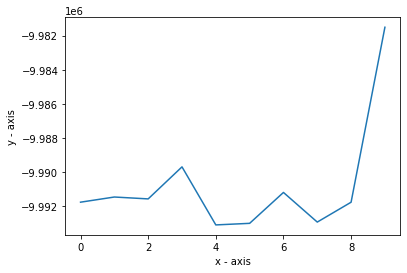

[237.53166120226376, 143.97612335756693, 116.94937900796248, 77.89824283355672, 19.301460996564373]


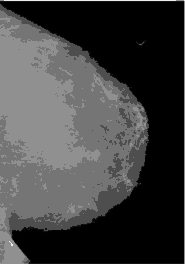

PSNR value for this image is 31.09255427164844
SSIM: 0.833499300563728


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:207: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


In [ ]:
%matplotlib inline
import cv2 
import math
import random
import numpy
import time
import matplotlib.pyplot as plt 
from math import log10, sqrt 
from skimage.measure import compare_ssim
from google.colab.patches import cv2_imshow

image='5.png'
img = cv2.imread(image,0)
h, bin_edges = numpy.histogram(img, bins=256, range=(1, 256))
L=256
rr = []
y = []
imgplot = cv2_imshow(img)
plt.show()
plt.plot( bin_edges[:-1],h) 
plt.show()
nt=5

# print(h)

def PSNR(original, compressed): 
    mse = numpy.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal .  
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 


def u(a,b):
    t1 = 0
    t2 = 0
    for i in range(a,b):
        t1 = t1 + (i*(h[i-1]+1))
    for i in range(a,b):
        t2 = t2 + h[i-1]+1
#     print(t2)
    return t1/t2

def hh(a,th):
    if a==1 :
        t=0
        for i in range(a,th[0]):
            t=t+(i*h[i-1]*math.log(u(1,th[0])))
        return t
    if a<=nt :
        t=0
        for i in range(th[a-2],th[a-1]):
            t=t+(i*h[i-1]*math.log(u(th[a-2],th[a-1])))
        return t
    if a==nt+1 :
        t=0
        for i in range(th[a-2],L+1):
            t=t+(i*h[i-1]*math.log(u(th[a-2],L+1)))
        return t

def objf(tt):
    t1=0
    t2=0
    tt=numpy.sort(tt)
    th=[0,0,0,0,0,0,0,0,0,0]
    for i in range(0,nt):
        th[i]=int(tt[i])
    for i in range(1,L+1):
        t1=t1+(i*h[i-1]*math.log10(i))
    for i in range(1,nt+2):
        t2=t2+hh(i,th)
    return t1-t2
    
def func1(x):
    total=0
    for i in range(len(x)):
        total+=x[i]**2
    return total

class Particle:
    def __init__(self,x0):
        self.position_i=[]
        self.velocity_i=[]
        self.pos_best_i=[]
        self.err_best_i=-1
        self.err_i=-1

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)
#         print(self.position_i)
#         print(self.err_i)
#         print(self.err_best_i)
#         print("")
        if self.err_i < self.err_best_i or self.err_best_i==-1:
#             print("updated")
#             print(self.err_best_i)
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    def update_velocity(self,pos_best_g):
        w=0.5
        c1=4
        c2=4

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]
            
            if self.position_i[i]>bounds[1][i]:
                self.position_i[i]=bounds[1][i]
            if self.position_i[i] < bounds[0][i]:
                self.position_i[i]=bounds[0][i]

class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions
        global err_best_g

        num_dimensions=len(x0)
        err_best_g=-1
        pos_best_g=[]

        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0))

        i=0
        while i < maxiter:
            for j in range(0,num_particles):
                swarm[j].evaluate(objf)

                if swarm[j].err_i < err_best_g or err_best_g == -1:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)
            #print i
            for j in range(0,num_particles):
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
                #print j,swarm[j].position_i,swarm[j].velocity_i,swarm[j].err_i
            i+=1

        print('FINAL:')
        print(pos_best_g)
        print(err_best_g)
        rr.append(pos_best_g)
        y.append(err_best_g)
        

x = []
for i in range(0,10):
    initial=numpy.random.randint(1,255,nt) 
    bounds=[(1,1,1,1,1,1,1,1,1,1),(255,255,255,255,255,255,255,255,255,255)]
    t=PSO(func1,initial,bounds,num_particles=10,maxiter=100)
    x.append(i)
plt.plot(x, y) 
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.show()

t=y[0]
result=rr[0]
for r in range(1,len(y)):
    if y[i]<t:
        t=y[i]
        result=rr[i]
result.sort()
result=result[::-1]
print(result)
h,w = img.shape
#print(img)
for i in range(0,h):
    for j in range(0,w):
        t = 255/nt
        p = 255
        for k in range(0,nt+1):
            if k==0:
                if img[i][j]>result[k] and img[i][j]<=256:
                    img[i][j]=int(result[k]+1)
            elif k<nt:
                if img[i][j]>result[k] and img[i][j]<result[k-1]:
                    img[i][j]=int(result[k]+1)
            else:
                if img[i][j]>0 and img[i][j]<result[k-1]:
                    img[i][j]=1
            p-=t

imgplot = cv2_imshow(img)
plt.show()
oimg = cv2.imread(image,0)
#print(img)
#print(oimg)
value=PSNR(img,oimg)
print('PSNR value for this image is '+str(value))
(score, diff) = compare_ssim(img, oimg, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))


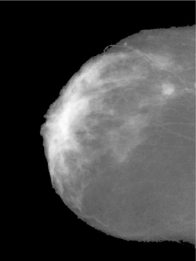

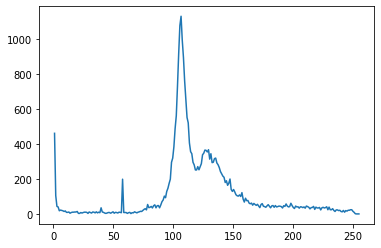

FINAL:
[49.78673208597817, 170.9206422754373, 1, 1.0, 121.69018241551582]
-9553643.342510238
FINAL:
[175.32620172981487, 74.83382193898247, 16.995799806773576, 123.88994900553355, 255.0]
-9564222.586885426
FINAL:
[122.47306202121032, 255.0, 18.46891284179437, 75.87496717755631, 170.47021949613534]
-9564363.226657037
FINAL:
[117.04047031643695, 143.19756256607567, 18.837873761460354, 77.71279226853719, 183.76784680546245]
-9568556.705902025
FINAL:
[17.869314617356775, 115.6299168343558, 185.22356283251494, 73.3632564440512, 142.1933942259745]
-9568401.301062498
FINAL:
[123.78516585488372, 18.992554461221072, 76.65814101115542, 1, 171.70262820431972]
-9564476.976567645
FINAL:
[123.02511268103177, 171.27712184396657, 91.47201299930875, 52.853293956444915, 12.399515930334639]
-9567361.41790988
FINAL:
[17.420772576604683, 145.87900649042635, 183.32818459145432, 71.25010562465809, 119.80698168414148]
-9568403.150153197
FINAL:
[18.672578774695065, 77.96207158685048, 123.77660285341561, 255.0,

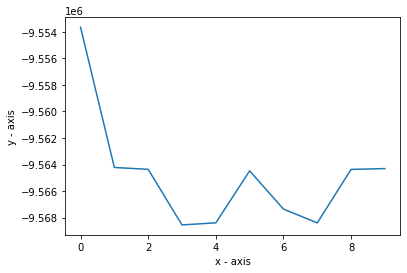

[255.0, 167.17519374469776, 122.9449030670179, 77.35493756429904, 18.56045746556673]


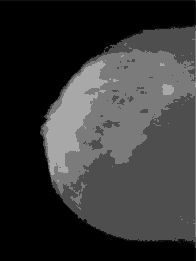

PSNR value for this image is 30.62392077833514
SSIM: 0.82609866266132


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:207: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


In [ ]:
%matplotlib inline
import cv2 
import math
import random
import numpy
import time
import matplotlib.pyplot as plt 
from math import log10, sqrt 
from skimage.measure import compare_ssim
from google.colab.patches import cv2_imshow

image='6.png'
img = cv2.imread(image,0)
h, bin_edges = numpy.histogram(img, bins=256, range=(1, 256))
L=256
rr = []
y = []
imgplot = cv2_imshow(img)
plt.show()
plt.plot( bin_edges[:-1],h) 
plt.show()
nt=5

# print(h)

def PSNR(original, compressed): 
    mse = numpy.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal .  
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 


def u(a,b):
    t1 = 0
    t2 = 0
    for i in range(a,b):
        t1 = t1 + (i*(h[i-1]+1))
    for i in range(a,b):
        t2 = t2 + h[i-1]+1
#     print(t2)
    return t1/t2

def hh(a,th):
    if a==1 :
        t=0
        for i in range(a,th[0]):
            t=t+(i*h[i-1]*math.log(u(1,th[0])))
        return t
    if a<=nt :
        t=0
        for i in range(th[a-2],th[a-1]):
            t=t+(i*h[i-1]*math.log(u(th[a-2],th[a-1])))
        return t
    if a==nt+1 :
        t=0
        for i in range(th[a-2],L+1):
            t=t+(i*h[i-1]*math.log(u(th[a-2],L+1)))
        return t

def objf(tt):
    t1=0
    t2=0
    tt=numpy.sort(tt)
    th=[0,0,0,0,0,0,0,0,0,0]
    for i in range(0,nt):
        th[i]=int(tt[i])
    for i in range(1,L+1):
        t1=t1+(i*h[i-1]*math.log10(i))
    for i in range(1,nt+2):
        t2=t2+hh(i,th)
    return t1-t2
    
def func1(x):
    total=0
    for i in range(len(x)):
        total+=x[i]**2
    return total

class Particle:
    def __init__(self,x0):
        self.position_i=[]
        self.velocity_i=[]
        self.pos_best_i=[]
        self.err_best_i=-1
        self.err_i=-1

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)
#         print(self.position_i)
#         print(self.err_i)
#         print(self.err_best_i)
#         print("")
        if self.err_i < self.err_best_i or self.err_best_i==-1:
#             print("updated")
#             print(self.err_best_i)
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    def update_velocity(self,pos_best_g):
        w=0.5
        c1=4
        c2=4

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]
            
            if self.position_i[i]>bounds[1][i]:
                self.position_i[i]=bounds[1][i]
            if self.position_i[i] < bounds[0][i]:
                self.position_i[i]=bounds[0][i]

class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions
        global err_best_g

        num_dimensions=len(x0)
        err_best_g=-1
        pos_best_g=[]

        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0))

        i=0
        while i < maxiter:
            for j in range(0,num_particles):
                swarm[j].evaluate(objf)

                if swarm[j].err_i < err_best_g or err_best_g == -1:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)
            #print i
            for j in range(0,num_particles):
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
                #print j,swarm[j].position_i,swarm[j].velocity_i,swarm[j].err_i
            i+=1

        print('FINAL:')
        print(pos_best_g)
        print(err_best_g)
        rr.append(pos_best_g)
        y.append(err_best_g)
        

x = []
for i in range(0,10):
    initial=numpy.random.randint(1,255,nt) 
    bounds=[(1,1,1,1,1,1,1,1,1,1),(255,255,255,255,255,255,255,255,255,255)]
    t=PSO(func1,initial,bounds,num_particles=10,maxiter=100)
    x.append(i)
plt.plot(x, y) 
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.show()

t=y[0]
result=rr[0]
for r in range(1,len(y)):
    if y[i]<t:
        t=y[i]
        result=rr[i]
result.sort()
result=result[::-1]
print(result)
h,w = img.shape
#print(img)
for i in range(0,h):
    for j in range(0,w):
        t = 255/nt
        p = 255
        for k in range(0,nt+1):
            if k==0:
                if img[i][j]>result[k] and img[i][j]<=256:
                    img[i][j]=int(result[k]+1)
            elif k<nt:
                if img[i][j]>result[k] and img[i][j]<result[k-1]:
                    img[i][j]=int(result[k]+1)
            else:
                if img[i][j]>0 and img[i][j]<result[k-1]:
                    img[i][j]=1
            p-=t

imgplot = cv2_imshow(img)
plt.show()
oimg = cv2.imread(image,0)
#print(img)
#print(oimg)
value=PSNR(img,oimg)
print('PSNR value for this image is '+str(value))
(score, diff) = compare_ssim(img, oimg, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))


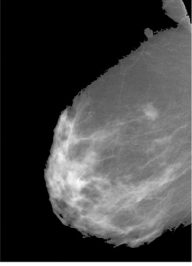

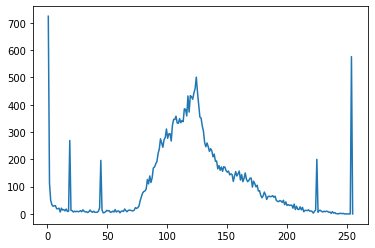

FINAL:
[106.67115062388282, 178.80354902128192, 139.96282555113905, 12.114602231933025, 63.38366254581272]
-9465092.763026223
FINAL:
[149.23807537172377, 65.75333448044888, 112.39993994843896, 12.502736174424879, 255.0]
-9464583.882914808
FINAL:
[186.69823628573081, 1.0, 139.64302594495786, 105.61884647734789, 39.38537268218728]
-9454634.7516657
FINAL:
[144.88263286525137, 111.0185584487698, 63.20538121925414, 188.4584944227241, 12.017964049056001]
-9465667.879881214
FINAL:
[65.11827706908721, 12.213968451088967, 112.41348598690035, 151.85794599565736, 255.0]
-9464591.557792265
FINAL:
[190.66091738467054, 112.6637939796148, 145.30240335293848, 12.461482521763275, 64.30727722207267]
-9465638.95861217
FINAL:
[108.73272004884352, 255, 41.242147360948884, 148.94507290830197, 255]
-9453051.860142708
FINAL:
[66.61668676148986, 151.05729028386477, 12.031063110182824, 255.0, 114.53217777272434]
-9464549.00310893
FINAL:
[113.30843398622018, 255, 65.34201648033034, 12.207014743643972, 151.160580

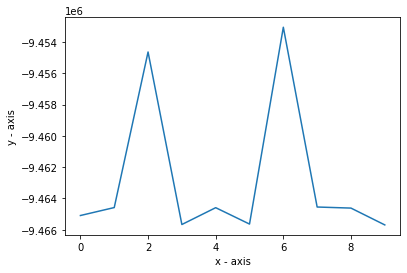

[188.12297096226115, 142.77686600836802, 110.55506002555721, 63.83729880783552, 12.570421292772094]


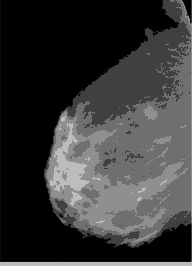

PSNR value for this image is 31.07473271159828
SSIM: 0.831908423773806


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:207: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


In [ ]:
%matplotlib inline
import cv2 
import math
import random
import numpy
import time
import matplotlib.pyplot as plt 
from math import log10, sqrt 
from skimage.measure import compare_ssim
from google.colab.patches import cv2_imshow

image='7.png'
img = cv2.imread(image,0)
h, bin_edges = numpy.histogram(img, bins=256, range=(1, 256))
L=256
rr = []
y = []
imgplot = cv2_imshow(img)
plt.show()
plt.plot( bin_edges[:-1],h) 
plt.show()
nt=5

# print(h)

def PSNR(original, compressed): 
    mse = numpy.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal .  
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 


def u(a,b):
    t1 = 0
    t2 = 0
    for i in range(a,b):
        t1 = t1 + (i*(h[i-1]+1))
    for i in range(a,b):
        t2 = t2 + h[i-1]+1
#     print(t2)
    return t1/t2

def hh(a,th):
    if a==1 :
        t=0
        for i in range(a,th[0]):
            t=t+(i*h[i-1]*math.log(u(1,th[0])))
        return t
    if a<=nt :
        t=0
        for i in range(th[a-2],th[a-1]):
            t=t+(i*h[i-1]*math.log(u(th[a-2],th[a-1])))
        return t
    if a==nt+1 :
        t=0
        for i in range(th[a-2],L+1):
            t=t+(i*h[i-1]*math.log(u(th[a-2],L+1)))
        return t

def objf(tt):
    t1=0
    t2=0
    tt=numpy.sort(tt)
    th=[0,0,0,0,0,0,0,0,0,0]
    for i in range(0,nt):
        th[i]=int(tt[i])
    for i in range(1,L+1):
        t1=t1+(i*h[i-1]*math.log10(i))
    for i in range(1,nt+2):
        t2=t2+hh(i,th)
    return t1-t2
    
def func1(x):
    total=0
    for i in range(len(x)):
        total+=x[i]**2
    return total

class Particle:
    def __init__(self,x0):
        self.position_i=[]
        self.velocity_i=[]
        self.pos_best_i=[]
        self.err_best_i=-1
        self.err_i=-1

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)
#         print(self.position_i)
#         print(self.err_i)
#         print(self.err_best_i)
#         print("")
        if self.err_i < self.err_best_i or self.err_best_i==-1:
#             print("updated")
#             print(self.err_best_i)
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    def update_velocity(self,pos_best_g):
        w=0.5
        c1=4
        c2=4

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]
            
            if self.position_i[i]>bounds[1][i]:
                self.position_i[i]=bounds[1][i]
            if self.position_i[i] < bounds[0][i]:
                self.position_i[i]=bounds[0][i]

class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions
        global err_best_g

        num_dimensions=len(x0)
        err_best_g=-1
        pos_best_g=[]

        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0))

        i=0
        while i < maxiter:
            for j in range(0,num_particles):
                swarm[j].evaluate(objf)

                if swarm[j].err_i < err_best_g or err_best_g == -1:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)
            #print i
            for j in range(0,num_particles):
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
                #print j,swarm[j].position_i,swarm[j].velocity_i,swarm[j].err_i
            i+=1

        print('FINAL:')
        print(pos_best_g)
        print(err_best_g)
        rr.append(pos_best_g)
        y.append(err_best_g)
        

x = []
for i in range(0,10):
    initial=numpy.random.randint(1,255,nt) 
    bounds=[(1,1,1,1,1,1,1,1,1,1),(255,255,255,255,255,255,255,255,255,255)]
    t=PSO(func1,initial,bounds,num_particles=10,maxiter=100)
    x.append(i)
plt.plot(x, y) 
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.show()

t=y[0]
result=rr[0]
for r in range(1,len(y)):
    if y[i]<t:
        t=y[i]
        result=rr[i]
result.sort()
result=result[::-1]
print(result)
h,w = img.shape
#print(img)
for i in range(0,h):
    for j in range(0,w):
        t = 255/nt
        p = 255
        for k in range(0,nt+1):
            if k==0:
                if img[i][j]>result[k] and img[i][j]<=256:
                    img[i][j]=int(result[k]+1)
            elif k<nt:
                if img[i][j]>result[k] and img[i][j]<result[k-1]:
                    img[i][j]=int(result[k]+1)
            else:
                if img[i][j]>0 and img[i][j]<result[k-1]:
                    img[i][j]=1
            p-=t

imgplot = cv2_imshow(img)
plt.show()
oimg = cv2.imread(image,0)
#print(img)
#print(oimg)
value=PSNR(img,oimg)
print('PSNR value for this image is '+str(value))
(score, diff) = compare_ssim(img, oimg, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))


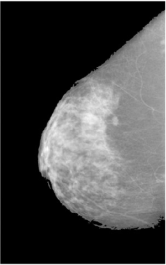

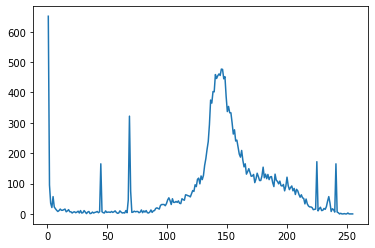

FINAL:
[179.46915479572598, 148.44516331829834, 68.41062861101416, 113.17310338342467, 14.520636500131891]
-8994374.653235894
FINAL:
[23.38781848773391, 129.87736833940767, 159.57603692217856, 191.39918437672796, 89.34402959475835]
-8994854.419987373
FINAL:
[8.378429387011192, 173.21375275258418, 133.39176616668797, 91.23277893645574, 42.24259452753449]
-8994053.629489977
FINAL:
[90.57056492596116, 196.5484257838342, 26.71754670105066, 158.1517705392499, 131.98620697096527]
-8994535.594903119
FINAL:
[184.62681861549578, 89.70655694248333, 124.41958633812429, 153.13788036412387, 24.38403911227303]
-8994794.240994457
FINAL:
[21.201822418019617, 129.56175743044977, 186.40512887753158, 84.81737299092065, 156.91717615811513]
-8994711.934275553
FINAL:
[173.68907200632222, 91.93744379131805, 255, 134.58723642978916, 23.046629661989037]
-8991158.825638928
FINAL:
[158.1518514252969, 90.57770520874062, 20.415067642282985, 129.1389886819253, 189.8096556040682]
-8994809.65653367
FINAL:
[128.772554

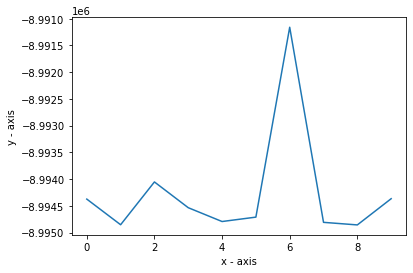

[179.46915479572598, 148.44516331829834, 113.17310338342467, 68.41062861101416, 14.520636500131891]


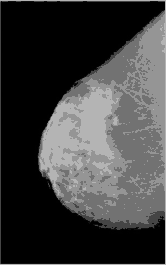

PSNR value for this image is 31.86047598472142
SSIM: 0.8495238949055176


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:207: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


In [ ]:
%matplotlib inline
import cv2 
import math
import random
import numpy
import time
import matplotlib.pyplot as plt 
from math import log10, sqrt 
from skimage.measure import compare_ssim
from google.colab.patches import cv2_imshow

image='8.png'
img = cv2.imread(image,0)
h, bin_edges = numpy.histogram(img, bins=256, range=(1, 256))
L=256
rr = []
y = []
imgplot = cv2_imshow(img)
plt.show()
plt.plot( bin_edges[:-1],h) 
plt.show()
nt=5

# print(h)

def PSNR(original, compressed): 
    mse = numpy.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal .  
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 


def u(a,b):
    t1 = 0
    t2 = 0
    for i in range(a,b):
        t1 = t1 + (i*(h[i-1]+1))
    for i in range(a,b):
        t2 = t2 + h[i-1]+1
#     print(t2)
    return t1/t2

def hh(a,th):
    if a==1 :
        t=0
        for i in range(a,th[0]):
            t=t+(i*h[i-1]*math.log(u(1,th[0])))
        return t
    if a<=nt :
        t=0
        for i in range(th[a-2],th[a-1]):
            t=t+(i*h[i-1]*math.log(u(th[a-2],th[a-1])))
        return t
    if a==nt+1 :
        t=0
        for i in range(th[a-2],L+1):
            t=t+(i*h[i-1]*math.log(u(th[a-2],L+1)))
        return t

def objf(tt):
    t1=0
    t2=0
    tt=numpy.sort(tt)
    th=[0,0,0,0,0,0,0,0,0,0]
    for i in range(0,nt):
        th[i]=int(tt[i])
    for i in range(1,L+1):
        t1=t1+(i*h[i-1]*math.log10(i))
    for i in range(1,nt+2):
        t2=t2+hh(i,th)
    return t1-t2
    
def func1(x):
    total=0
    for i in range(len(x)):
        total+=x[i]**2
    return total

class Particle:
    def __init__(self,x0):
        self.position_i=[]
        self.velocity_i=[]
        self.pos_best_i=[]
        self.err_best_i=-1
        self.err_i=-1

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)
#         print(self.position_i)
#         print(self.err_i)
#         print(self.err_best_i)
#         print("")
        if self.err_i < self.err_best_i or self.err_best_i==-1:
#             print("updated")
#             print(self.err_best_i)
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    def update_velocity(self,pos_best_g):
        w=0.5
        c1=4
        c2=4

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]
            
            if self.position_i[i]>bounds[1][i]:
                self.position_i[i]=bounds[1][i]
            if self.position_i[i] < bounds[0][i]:
                self.position_i[i]=bounds[0][i]

class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions
        global err_best_g

        num_dimensions=len(x0)
        err_best_g=-1
        pos_best_g=[]

        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0))

        i=0
        while i < maxiter:
            for j in range(0,num_particles):
                swarm[j].evaluate(objf)

                if swarm[j].err_i < err_best_g or err_best_g == -1:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)
            #print i
            for j in range(0,num_particles):
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
                #print j,swarm[j].position_i,swarm[j].velocity_i,swarm[j].err_i
            i+=1

        print('FINAL:')
        print(pos_best_g)
        print(err_best_g)
        rr.append(pos_best_g)
        y.append(err_best_g)
        

x = []
for i in range(0,10):
    initial=numpy.random.randint(1,255,nt) 
    bounds=[(1,1,1,1,1,1,1,1,1,1),(255,255,255,255,255,255,255,255,255,255)]
    t=PSO(func1,initial,bounds,num_particles=10,maxiter=100)
    x.append(i)
plt.plot(x, y) 
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.show()

t=y[0]
result=rr[0]
for r in range(1,len(y)):
    if y[i]<t:
        t=y[i]
        result=rr[i]
result.sort()
result=result[::-1]
print(result)
h,w = img.shape
#print(img)
for i in range(0,h):
    for j in range(0,w):
        t = 255/nt
        p = 255
        for k in range(0,nt+1):
            if k==0:
                if img[i][j]>result[k] and img[i][j]<=256:
                    img[i][j]=int(result[k]+1)
            elif k<nt:
                if img[i][j]>result[k] and img[i][j]<result[k-1]:
                    img[i][j]=int(result[k]+1)
            else:
                if img[i][j]>0 and img[i][j]<result[k-1]:
                    img[i][j]=1
            p-=t

imgplot = cv2_imshow(img)
plt.show()
oimg = cv2.imread(image,0)
#print(img)
#print(oimg)
value=PSNR(img,oimg)
print('PSNR value for this image is '+str(value))
(score, diff) = compare_ssim(img, oimg, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))
